# S8_T01_Feature_Engineering
# Statement
**Description**
Learn how to manage parameters with Python.

Level 1
- Exercise 1
Choose a dataset and normalize categorical attributes in dummy. Standardize numeric attributes with StandardScaler.

Level 2
- Exercise 2
Proceed with the chosen data set and apply principal component analysis.

Level 3  
-Exercise 3
Continues with the chosen data set and normalizes the data taking into account outliers.


In [1]:
# Import Libraries
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Warnings default activated.
import warnings
# warnings.filterwarnings('ignore')
warnings.filterwarnings("default")

In [3]:
# Personal functions
# Dataframe's Information
def Pers_df_info(par_df):
    print("[-------------------------SHAPE------------------------]")
    display(par_df.shape)
    print("[-------------------------INFO-------------------------]")
    display(par_df.info())
    print("[-----------------------DESCRIBE-----------------------]")
    display(par_df.describe(include='all').round(2))
    print("[------------------------NaN's-------------------------]")
    list_cols = par_df.columns
    display(par_df[list_cols].isnull().sum())
    print("[--------------Values in categorical variables---------]")
    list_num_cols = par_df._get_numeric_data().columns
    list_cat_cols = list(set(list_cols) - set(list_num_cols))
    for i in list_cat_cols:
        print("--------------%s--------------" %i)
        display(df[i].value_counts())

# Activate seaborn’s “default” theme
sns.set_theme()
# Usual Boxplot
def Pers_boxplot1D(par_x, par_df):
    fig, ax = plt.subplots(figsize=(20,12))
    sTitle = 'Boxplot ' + par_x 
    ax.set_title(sTitle)
    sns.boxplot(x= par_x, data= par_df)
    plt.show()
# Usual Boxplot 2D
def Pers_boxplot2D(par_x, par_y, par_df):
    fig, ax = plt.subplots(figsize=(20,12))
    sTitle = 'Boxplot ' + par_x +' vs. '+ par_y 
    ax.set_title(sTitle)
    sns.boxplot(x= par_x, y= par_y , data= par_df)
    plt.show()

# Usual Violinplot 2D
def Pers_violinplot2D(par_x, par_y, par_df):
    fig, ax = plt.subplots(figsize=(20,12))
    sTitle = 'Violinplot ' + par_x +' vs. '+ par_y 
    ax.set_title(sTitle)
    sns.violinplot(x= par_x, y= par_y , data=par_df)
    plt.show()

# Remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## Preprocessing Data 

In [4]:
# Dataframe Import
df = pd.read_csv('./data_cleaned_2021.csv')
df_complete = df
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


#### Data meaning:  

We are going to take the dataset from Kaggle about Data scientist's salaries:
🗨️ https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor

**Context**  
>This dataset was made by scrapping the job postings related to the position of 'Data Scientist' from www.glassdoor.com in USA, I used selenium to scrap the data. After scrapping the raw data, I removed the duplicated rows from it which reduced the records from 1000 to 742. After this, several simplifications were performed to make the data user friendly for further data analysis and modelling.

**Content**  
>With each job, I got the following columns: Job title, Salary Estimate, Job Description, Rating, Company, Location, Company , Headquarters, , , any Size, Company Founded Date, Type of Ownership, Industry, Sector, Revenue, Competitors.

>Note: Columns with value -1 means either the data scraping was unsuccessful for that or the data was not present.

**Columns**  


|Column Name  |Description  |
|---------|---------|
Rating |It gives the rating of the company
Avg Salary(K)     | Average salary reported for the job in a particular company.
Age               | Age of the company (in yrs)
job_title_sim     | Simplified job title
seniority_by_title| Seniority in title  
Degree            | M: (Master) If the job title requires it or provide experience years for having it. 
| | P: (Phd - Doctorate) If the job title requires it or provide experience years for having it.



In [5]:
# Let's first clean our column's names:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.replace(r'\(k\)',"_k", regex=True)
df.columns

Index(['index', 'job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'lower_salary', 'upper_salary',
       'avg_salary_k', 'company_txt', 'job_location', 'age', 'python', 'spark',
       'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor',
       'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'degree'],
      dtype='object')

In [6]:
# Let's just now take the columns that we think are going to be useful in our analysis.
df = df[['rating','avg_salary_k','age','job_title_sim','seniority_by_title','degree']]
df

,rating,avg_salary_k,age,job_title_sim,seniority_by_title,degree
0,3.8,72.0,48,data scientist,na,M
1,3.4,87.5,37,data scientist,na,M
2,4.8,85.0,11,data scientist,na,M
3,3.8,76.5,56,data scientist,na,na
4,2.9,114.5,23,data scientist,na,na
...,...,...,...,...,...,...
737,3.9,84.5,191,other scientist,sr,M
738,4.4,102.5,15,data engineer,sr,na
739,2.6,73.5,37,other scientist,na,P
740,3.2,127.5,-1,data scientist,na,na


#### EDA:

In [7]:
# Let's use our personal function Pers_df_info
Pers_df_info(df)

[-------------------------SHAPE------------------------]


(742, 6)

[-------------------------INFO-------------------------]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              742 non-null    float64
 1   avg_salary_k        742 non-null    float64
 2   age                 742 non-null    int64  
 3   job_title_sim       742 non-null    object 
 4   seniority_by_title  742 non-null    object 
 5   degree              742 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.9+ KB


None

[-----------------------DESCRIBE-----------------------]


,rating,avg_salary_k,age,job_title_sim,seniority_by_title,degree
count,742.00,742.00,742.00,742,742,742
unique,NaN,NaN,NaN,10,3,3
top,NaN,NaN,NaN,data scientist,na,na
freq,NaN,NaN,NaN,313,519,383
mean,3.62,101.48,47.52,NaN,NaN,NaN
std,0.80,37.48,53.84,NaN,NaN,NaN
min,-1.00,15.50,-1.00,NaN,NaN,NaN
25%,3.30,73.50,12.00,NaN,NaN,NaN
50%,3.70,97.50,25.00,NaN,NaN,NaN
75%,4.00,122.50,60.00,NaN,NaN,NaN


[------------------------NaN's-------------------------]


rating                0
avg_salary_k          0
age                   0
job_title_sim         0
seniority_by_title    0
degree                0
dtype: int64

[--------------Values in categorical variables---------]
--------------seniority_by_title--------------


na    519
sr    220
jr      3
Name: seniority_by_title, dtype: int64

--------------degree--------------


na    383
M     252
P     107
Name: degree, dtype: int64

--------------job_title_sim--------------


data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

#### Observations:
* There are no NaN's, but if we look at the values we see lots of 'na' in seniority_by_title and degree
* We are going to analyze just the job title data scientist, that we are interested right now.

In [8]:
# Test Pandas Profiling Report, it generates output in html.
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

C:\Users\jalor\anaconda3\envs\ITAcademy\lib\site-packages\visions\dtypes\boolean.py:764: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "type": np.bool,
C:\Users\jalor\anaconda3\envs\ITAcademy\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
Summarize dataset:  75%|███████▌  | 15/20 [00:05<00:01,  2.53it/s, Get missing diagrams]               C:\Users\jalor\anaconda3\envs\ITAcademy\lib\site-packages\missingno\missingno.p

In [9]:
# Filter just job data scientist on dataframe df_ds
df_ds = df[df['job_title_sim'] == 'data scientist']

#### Plots:

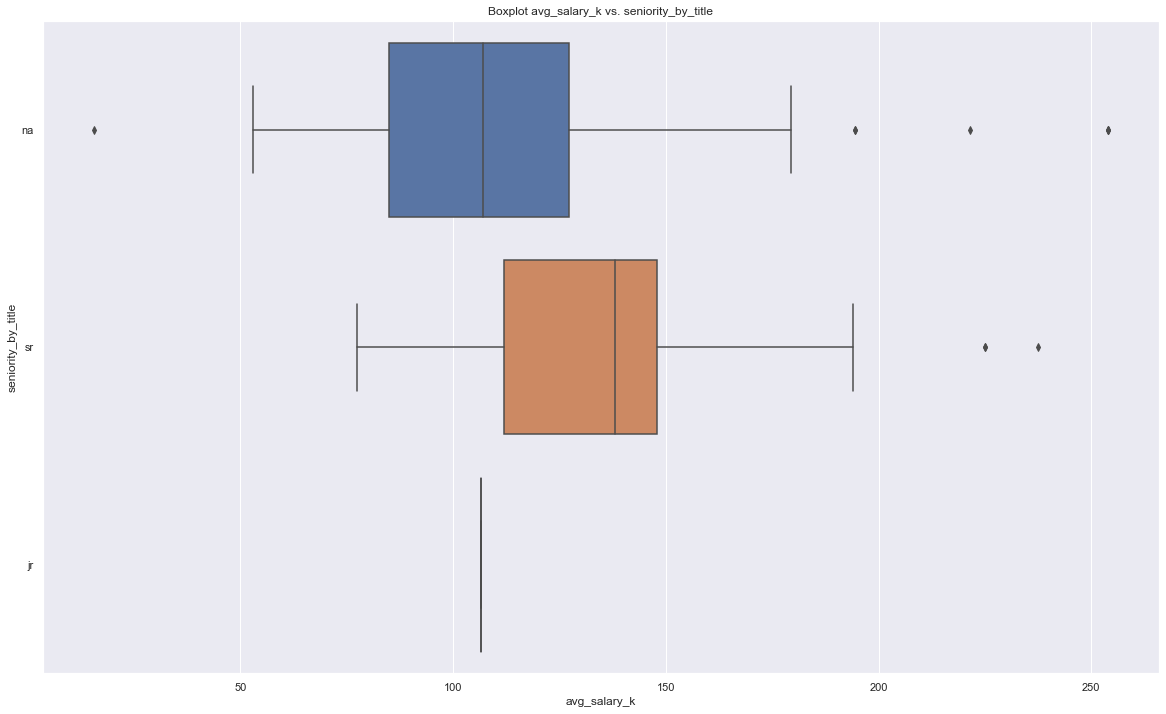

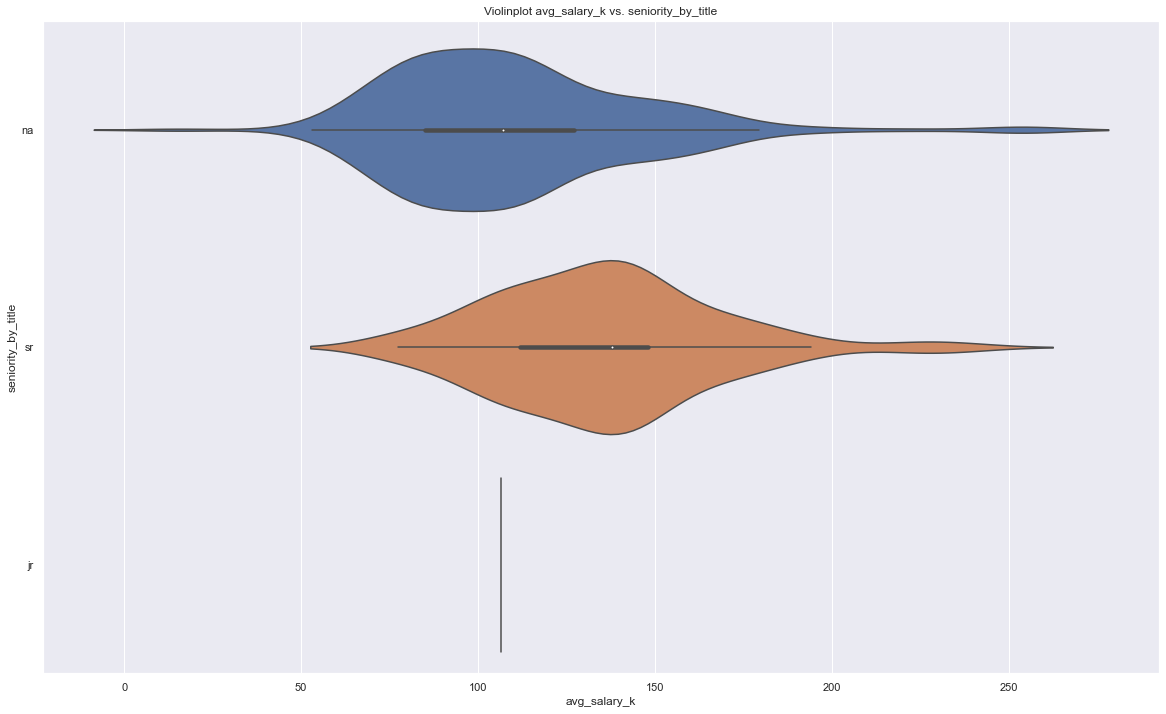

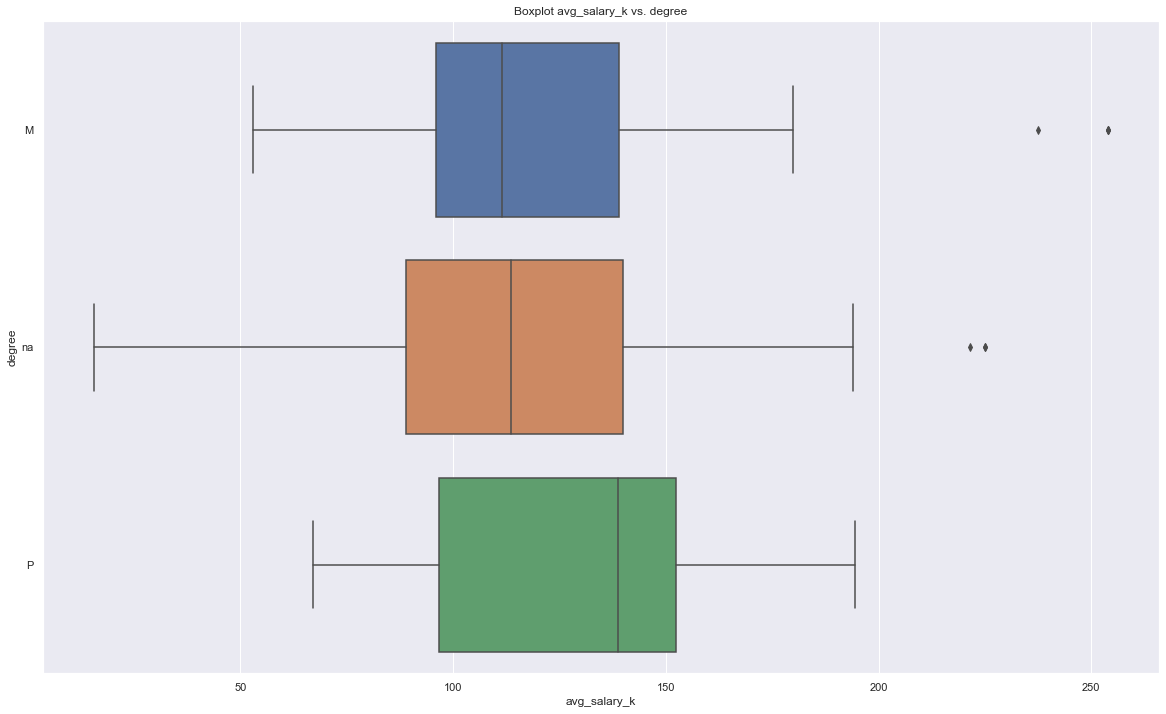

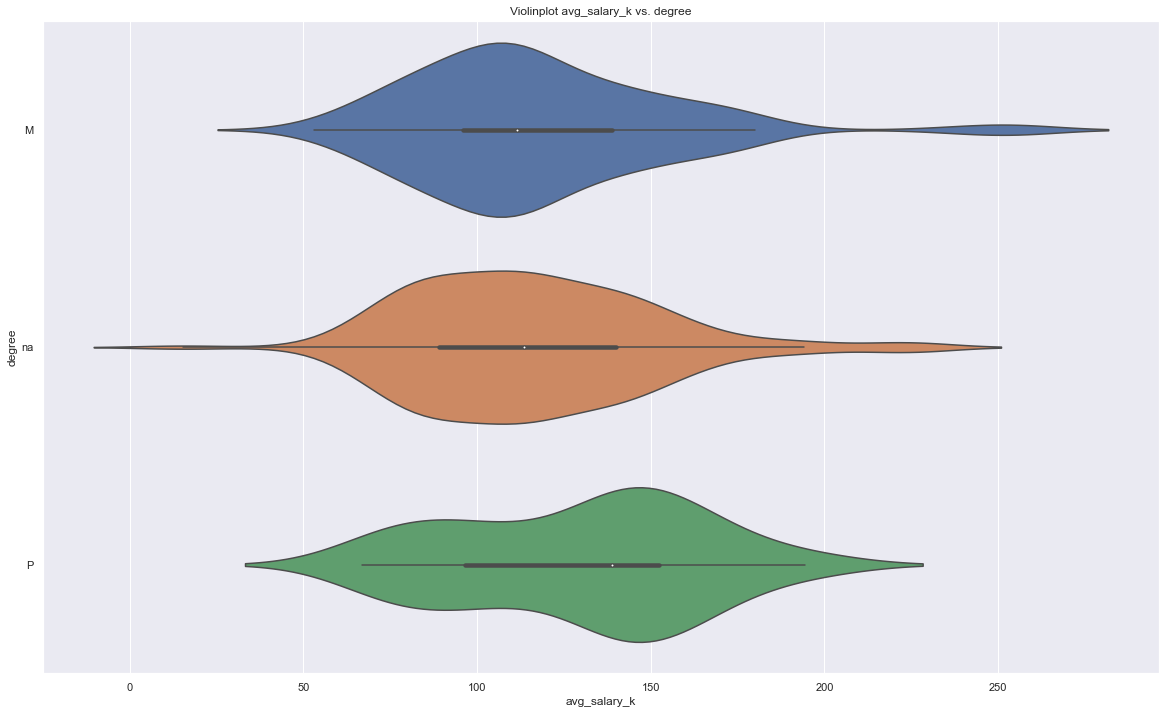

In [10]:
# let's plot the relation between categorical variables and salary:
# seniority_by_title
Pers_boxplot2D('avg_salary_k','seniority_by_title',df_ds)
Pers_violinplot2D('avg_salary_k','seniority_by_title',df_ds)
# degree
Pers_boxplot2D('avg_salary_k','degree',df_ds)
Pers_violinplot2D('avg_salary_k','degree',df_ds)


#### Observations:
* As seen before, there are a lot of na values, but just because the web scrapping method failed in order to get this value.  
As there are so many, we will take it as another valid value of our dataset and analyse it as so.

## Level 1
### Exercise 1
Choose a dataset and normalize categorical attributes in dummy. Standardize numeric attributes with StandardScaler.

#### Normalize categorical attributes in dummy (pandas.get_dummies)
![](2022-02-26-18-19-28.png)    
from 📝 https://medium.com/@stallonejacob/data-science-scaling-of-data-in-python-ec7ad220b339

To encode categorical attributes, there are different techniques, like label encoding (convert list of values to numbers)  
or the technique OHE (One Hot Encoding) that we are going to use. OHE also normalizes categorical values to 0/1 values in new columns.

![](2022-02-25-13-14-22.png)
from 📝 https://en.wikipedia.org/wiki/One-hot   

This is used to pre-process data that will be used to train models.


In [11]:
# Use of get_dummies (converts categorical values to binary. This is done to train models)
df_norm = pd.get_dummies(df_ds)
df_norm

,rating,avg_salary_k,age,job_title_sim_data scientist,seniority_by_title_jr,seniority_by_title_na,seniority_by_title_sr,degree_M,degree_P,degree_na
0,3.8,72.0,48,1,0,1,0,1,0,0
1,3.4,87.5,37,1,0,1,0,1,0,0
2,4.8,85.0,11,1,0,1,0,1,0,0
3,3.8,76.5,56,1,0,1,0,0,0,1
4,2.9,114.5,23,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
722,3.9,140.0,53,1,0,0,1,0,0,1
723,3.2,77.5,63,1,0,0,1,0,1,0
734,3.6,68.5,170,1,0,1,0,1,0,0
736,3.6,111.5,4,1,0,0,1,1,0,0


#### Standardize numeric attributes with StandardScaler.
![](2022-02-26-18-18-29.png)


![](2022-02-25-14-19-25.png)
from 📝 https://en.wikipedia.org/wiki/Standard_score
Expected value as Arithmetic Mean.   

In [12]:
# StandardScaler used on defined columns 

# #list for cols to scale
cols_to_scale = ["rating", "avg_salary_k","age"]
#create and fit scaler
scaler = StandardScaler()
scaler.fit(df_norm[cols_to_scale])
#scale selected data
df_norm[cols_to_scale] = scaler.transform(df_norm[cols_to_scale])

df_norm

,rating,avg_salary_k,age,job_title_sim_data scientist,seniority_by_title_jr,seniority_by_title_na,seniority_by_title_sr,degree_M,degree_P,degree_na
0,0.072377,-1.292885,0.007513,1,0,1,0,1,0,0
1,-0.516039,-0.860005,-0.208053,1,0,1,0,1,0,0
2,1.543417,-0.929825,-0.717572,1,0,1,0,1,0,0
3,0.072377,-1.167211,0.164288,1,0,1,0,0,0,1
4,-1.251559,-0.105956,-0.482409,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
722,0.219481,0.606202,0.105498,1,0,0,1,0,0,1
723,-0.810247,-1.139283,0.301467,1,0,0,1,0,1,0
734,-0.221831,-1.390633,2.398336,1,0,1,0,1,0,0
736,-0.221831,-0.189739,-0.854751,1,0,0,1,1,0,0


## Level 2
### - Exercise 2 - PCA
Proceed with the chosen data set and apply principal component analysis (PCA).

As PCA is related with choosing the important features or columns, we are going to select the original df, with 42 columns or features.
![](2022-02-25-14-27-18.png)
![](2022-02-25-14-25-29.png)
from 📝 https://en.wikipedia.org/wiki/Principal_component_analysis 

In [13]:
# Import Application PCA and help
from sklearn.decomposition import PCA
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [14]:
# Let's first clean our column's names:
df_complete.columns = df_complete.columns.str.lower()
df_complete.columns = df_complete.columns.str.replace(" ","_")
df_complete.columns = df_complete.columns.str.replace(r'\(k\)',"_k", regex=True)
df_complete.columns

Index(['index', 'job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'lower_salary', 'upper_salary',
       'avg_salary_k', 'company_txt', 'job_location', 'age', 'python', 'spark',
       'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor',
       'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'degree'],
      dtype='object')

In [15]:
# Second, as we are going to standardize the data, we need before to choose only the numerical features:
df_complete.dtypes.value_counts()

int64      23
object     17
float64     2
dtype: int64

In [16]:
# We are going to choose 25 features (23 int64 and 2 float64)
df_num = df_complete.select_dtypes(include=[np.number])
df_num.head()

,index,rating,founded,hourly,employer_provided,lower_salary,upper_salary,avg_salary_k,age,python,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,0,3.8,1973,0,0,53,91,72.0,48,1,...,0,0,0,0,0,1,1,0,0,0
1,1,3.4,1984,0,0,63,112,87.5,37,1,...,0,0,0,0,0,0,0,0,0,0
2,2,4.8,2010,0,0,80,90,85.0,11,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3.8,1965,0,0,56,97,76.5,56,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2.9,1998,0,0,86,143,114.5,23,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Third, we need to standardize all the values
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df_num)
scaled_X

array([[-1.67783193,  0.22622561,  0.27341329, ..., -0.11688115,
        -0.22909009, -0.13867505],
       [-1.67425545, -0.27335594,  0.29555283, ..., -0.11688115,
        -0.22909009, -0.13867505],
       [-1.67067897,  1.47517949,  0.34788265, ..., -0.11688115,
        -0.22909009, -0.13867505],
       ...,
       [ 1.7269772 , -1.27251905,  0.29555283, ..., -0.11688115,
        -0.22909009, -0.13867505],
       [ 1.73055368, -0.52314672, -3.69962784, ..., -0.11688115,
        -0.22909009, -0.13867505],
       [ 1.73770664, -0.02356517,  0.26133717, ..., -0.11688115,
        -0.22909009, -0.13867505]])

In [18]:
# Let's test how much variance is explained with 10 components
pca_10 = PCA(n_components=10)
pca_10.fit(scaled_X)
print("The variance explained with 10 components is: %.3f" % np.sum(pca_10.explained_variance_ratio_))

The variance explained with 10 components is: 0.692


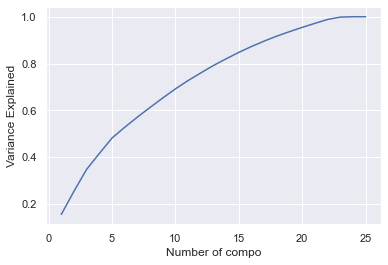

In [19]:
# Let's now test all components and graph them with the explained variance

explained_variance = []

for n in range(1,26):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(range(1,26), explained_variance)
plt.xlabel("Number of compo")
plt.ylabel("Variance Explained")
plt.show()

Conclusion:  
It seems that with about 17 components 90% of the variance is explained. Not a very good output.

## Level 3  
### -Exercise 3 - Remove Outliers
Continues with the chosen data set and normalizes the data taking into account outliers.
![](2022-02-26-18-25-05.png)  
![](2022-02-26-18-25-40.png)  
from 📝 https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#three   
![](2022-02-27-20-27-24.png)   
from 📝 https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21  
We are going to retake the dataframe df_ds. Dataframe only with "relevant" columns and filtered with data scientist's salaries.

In [20]:
# Explore the dataset we are going to use:
df_ds.head()

,rating,avg_salary_k,age,job_title_sim,seniority_by_title,degree
0,3.8,72.0,48,data scientist,na,M
1,3.4,87.5,37,data scientist,na,M
2,4.8,85.0,11,data scientist,na,M
3,3.8,76.5,56,data scientist,na,na
4,2.9,114.5,23,data scientist,na,na


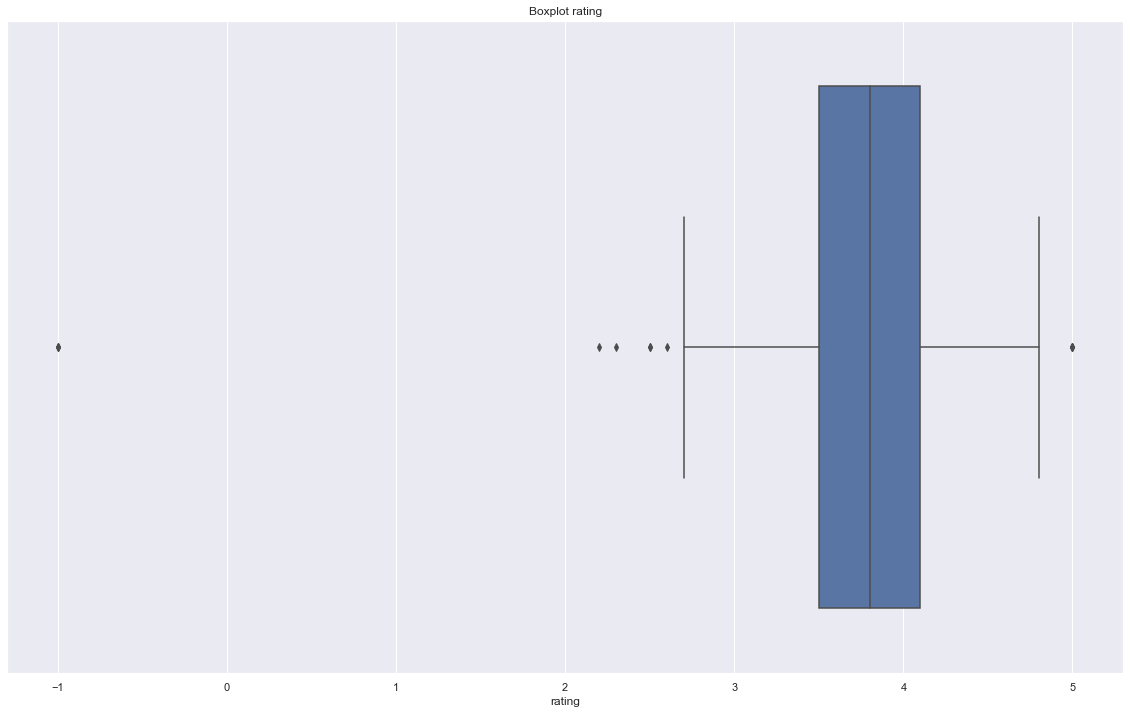

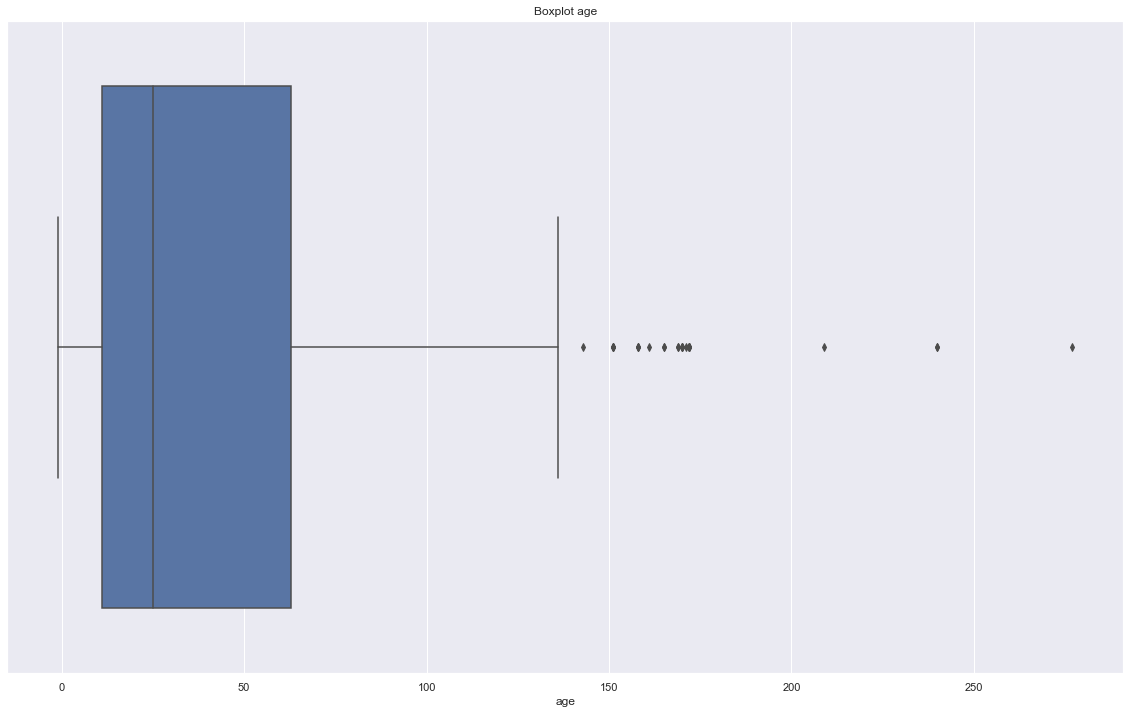

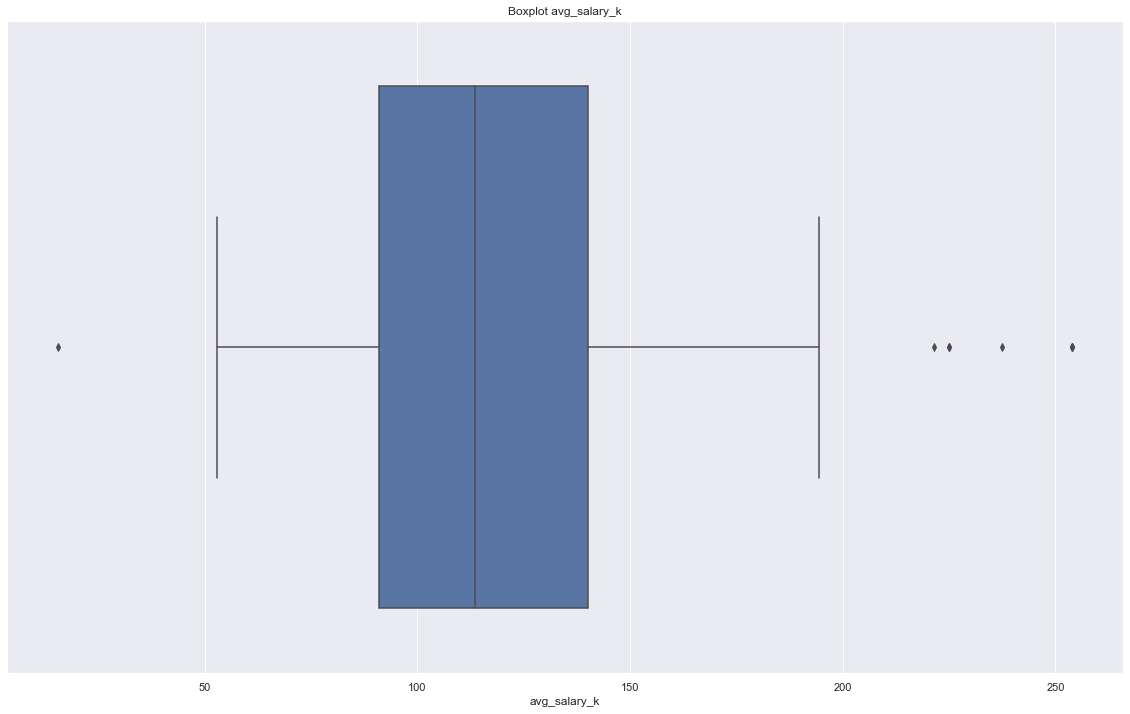

In [21]:
# Let's plot the numerical columns in boxplot to identify outlayers.
# rating	
Pers_boxplot1D('rating',df_ds)
# age
Pers_boxplot1D('age',df_ds)
# age
Pers_boxplot1D('avg_salary_k',df_ds)


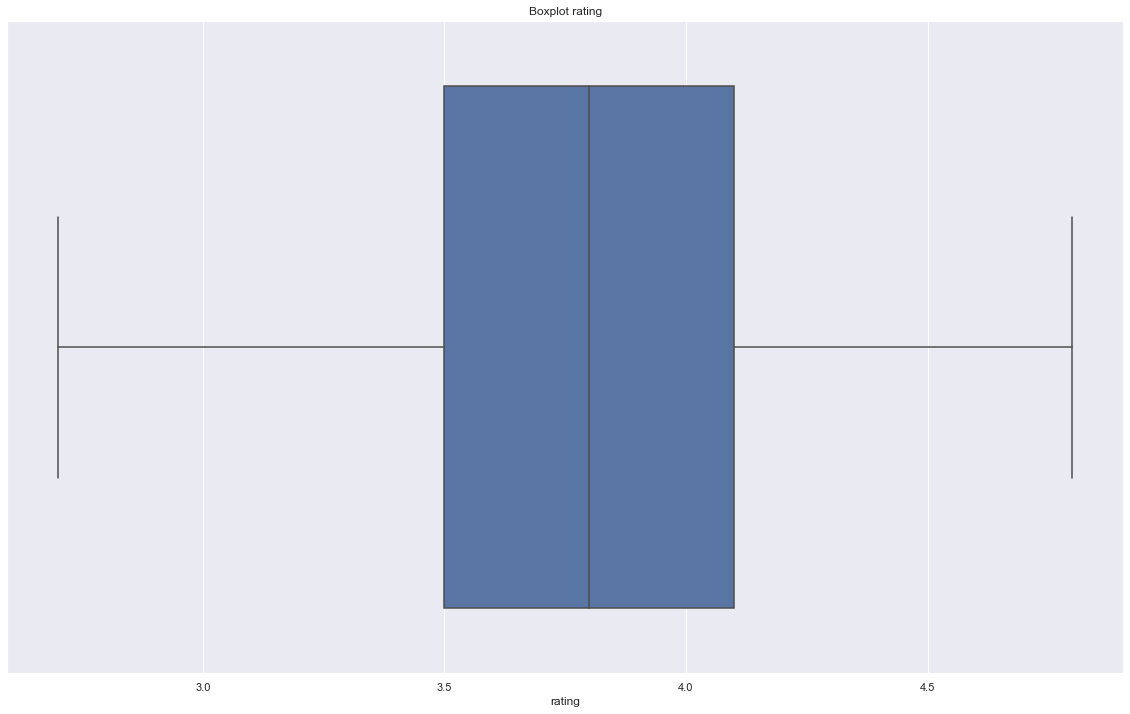

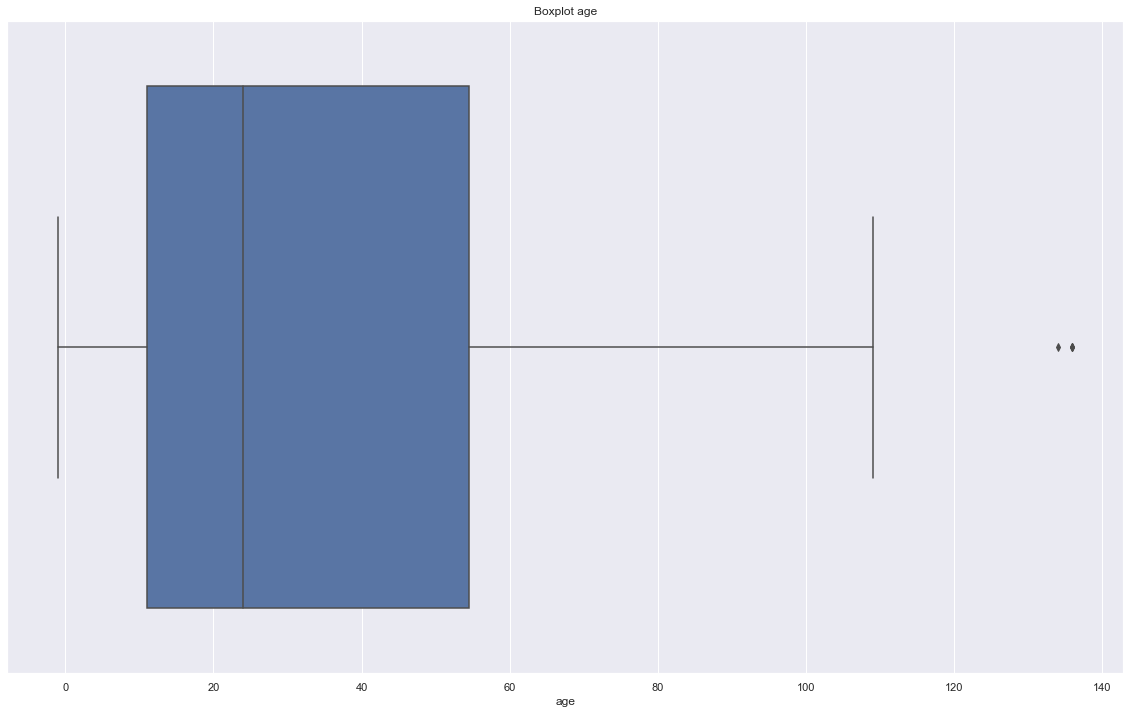

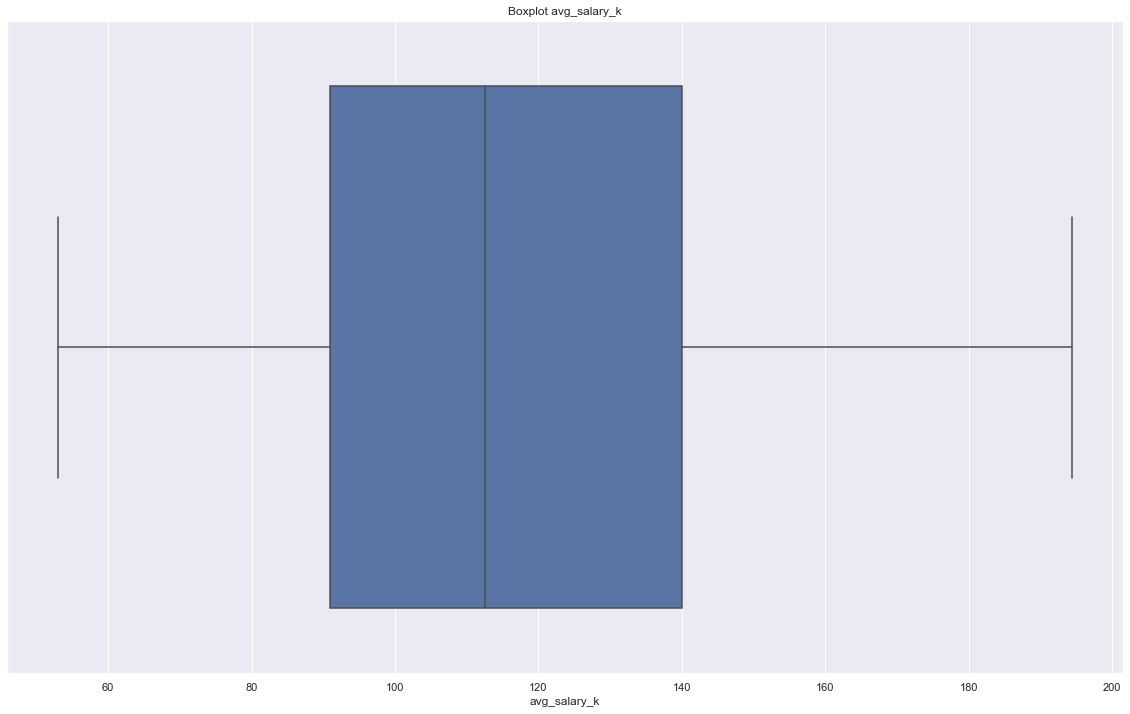

In [22]:
# Now, let's take off the few outlayers and replot the graphics.
#1D
df_ds = remove_outlier(df_in= df_ds, col_name= 'age')
df_ds = remove_outlier(df_in= df_ds, col_name= 'rating')
df_ds = remove_outlier(df_in= df_ds, col_name= 'avg_salary_k')
# rating	
Pers_boxplot1D('rating',df_ds)
# age
Pers_boxplot1D('age',df_ds)
# avg_salary_k
Pers_boxplot1D('avg_salary_k',df_ds)

Conclusion:  

As we can see on the last graphics, all outliers of the three numerical columns have been removed.   
The exception is two outliers in the age column, as the other outlayers in these columns have been removed,   
our best guess is that these 2 values are not really out from the Q3+1.5IQR, and is graphical issue.